<a href="https://colab.research.google.com/github/sankichi92/satelliteBook/blob/main/notebooks/4-4-agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-4 農業分野における衛星データ利用事例

[『Pythonで学ぶ衛星データ解析基礎』](https://gihyo.jp/book/2022/978-4-297-13232-3)第4章 衛星データ解析手法別演習 [解析編] より。

In [1]:
!date --rfc-3339=seconds

2023-01-09 14:17:03+00:00


In [2]:
!python --version

Python 3.8.16


In [3]:
!pip install pystac-client>=0.5.1 planetary-computer>=0.4.9 geopandas>=0.12.2 stackstac>=0.4.3 rioxarray>=0.13.3

In [4]:
%config InlineBackend.figure_formats = ['retina']

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100

## 米の収量推定に挑む

Planetary Computer で2007年から2021年それぞれについて、茨城県を含むタイル（h29v05）における9月頃の [MODIS Vegetation Indices 16-Day (250m)](https://planetarycomputer.microsoft.com/dataset/modis-13Q1-061) のデータを検索する。

In [6]:
from pystac_client import Client
import planetary_computer

client = Client.open(
    'https://planetarycomputer.microsoft.com/api/stac/v1',
    modifier=planetary_computer.sign_inplace,
)

# 2012〜2014年だけ期間が異なるのは、「代表プロダクトは画像を見て適切な組み合わせを選択」したとのこと。
datetimes = [f'{year}-09' for year in range(2007, 2012)] + \
             [f'{year}-08-25/{year}-09-20' for year in range(2012, 2015)] + \
             [f'{year}-09' for year in range(2015, 2022)]

res_items = []
for datetime in datetimes:
  res = client.search(
      collections='modis-13Q1-061',
      datetime=datetime,
      max_items=2,
      query=[
          'modis:horizontal-tile=29',
          'modis:vertical-tile=5',
          'platform=terra' # 書籍の結果と一致させるため
      ]
  )
  res_items += res.items()

len(res_items)

30

In [7]:
import geopandas as gpd
res_gdf = gpd.GeoDataFrame.from_features([item.to_dict() for item in res_items])
res_gdf['id'] = [item.id for item in res_items]
res_gdf.set_index('id', inplace=True)
res_gdf

,geometry,created,updated,datetime,platform,proj:epsg,proj:wkt2,proj:shape,instruments,end_datetime,modis:tile-id,proj:geometry,proj:transform,start_datetime,modis:vertical-tile,modis:horizontal-tile
id,,,,,,,,,,,,,,,,
MOD13Q1.A2007273.h29v05.061.2021076145608,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-03-17T18:56:08Z,2021-03-17T14:55:23.704000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2007-10-15T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2007-09-30T00:00:00Z,5,29
MOD13Q1.A2007257.h29v05.061.2021074210255,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-03-16T01:02:55Z,2021-03-15T20:32:28.079000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2007-09-29T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2007-09-14T00:00:00Z,5,29
MOD13Q1.A2008273.h29v05.061.2021108163230,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-04-18T20:32:30Z,2021-04-18T15:51:04.097000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2008-10-14T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2008-09-29T00:00:00Z,5,29
MOD13Q1.A2008257.h29v05.061.2021107155112,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-04-17T19:51:12Z,2021-04-17T15:16:05.054000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2008-09-28T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2008-09-13T00:00:00Z,5,29
MOD13Q1.A2009273.h29v05.061.2021143170236,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-05-23T21:02:36Z,2021-05-24T17:13:06.123000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2009-10-15T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2009-09-30T00:00:00Z,5,29
MOD13Q1.A2009257.h29v05.061.2021142081400,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-05-22T12:14:00Z,2021-05-23T10:44:40.318000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2009-09-29T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2009-09-14T00:00:00Z,5,29
MOD13Q1.A2010273.h29v05.061.2021176075101,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-06-25T11:51:02Z,2021-06-26T04:13:55.599000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2010-10-15T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2010-09-30T00:00:00Z,5,29
MOD13Q1.A2010257.h29v05.061.2021175223502,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-06-25T02:35:03Z,2021-06-25T12:04:37.689000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2010-09-29T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2010-09-14T00:00:00Z,5,29
MOD13Q1.A2011273.h29v05.061.2021198143947,"POLYGON ((126.86549 29.91795, 143.61983 40.107...",2021-07-17T18:39:47Z,2021-08-02T16:30:28.980000Z,None,terra,None,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based u...","[4800, 4800]",[modis],2011-10-15T23:59:59Z,51029005,"{'type': 'Polygon', 'coordinates': [[[13343406...","[231.65635826395825, 0.0, 12231455.716333, 0.0...",2011-09-30T00:00:00Z,5,29


In [8]:
res_items[0]

ID: MOD13Q1.A2007273.h29v05.061.2021076145608
"Bounding Box: [126.86548793, 29.81609378, 156.7349147, 40.10790789]"
created: 2021-03-17T18:56:08Z
updated: 2021-03-17T14:55:23.704000Z
datetime: None
platform: terra
proj:epsg: None
"proj:wkt2: PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]"
"proj:shape: [4800, 4800]"
instruments: ['modis']
end_datetime: 2007-10-15T23:59:59Z


In [9]:
res_items[0].assets.keys()

dict_keys(['hdf', 'metadata', '250m_16_days_EVI', '250m_16_days_NDVI', '250m_16_days_VI_Quality', '250m_16_days_MIR_reflectance', '250m_16_days_NIR_reflectance', '250m_16_days_red_reflectance', '250m_16_days_blue_reflectance', '250m_16_days_sun_zenith_angle', '250m_16_days_pixel_reliability', '250m_16_days_view_zenith_angle', '250m_16_days_relative_azimuth_angle', '250m_16_days_composite_day_of_the_year', 'tilejson', 'rendered_preview'])

検索結果を xarray.DataArray にし、年ごとに EVI を平均する。

In [10]:
import stackstac

# stackstac が datetime の値で time dim を作成するため、datetime を埋める
for item in res_items:
  item.set_datetime(item.common_metadata.start_datetime)

evi_data = stackstac.stack(res_items, assets=['250m_16_days_EVI'], epsg=32654)
evi_data = evi_data.resample(time='YS').mean()
evi_data.name = 'EVI'
evi_data

,Array,Chunk
Bytes,2.58 GiB,8.00 MiB
Shape,"(15, 1, 4801, 4801)","(1, 1, 1024, 1024)"
Count,3060 Tasks,375 Chunks
Type,float64,numpy.ndarray


2007年の EVI を画像表示する。

Text(0.5, 1.0, 'EVI in 2007')

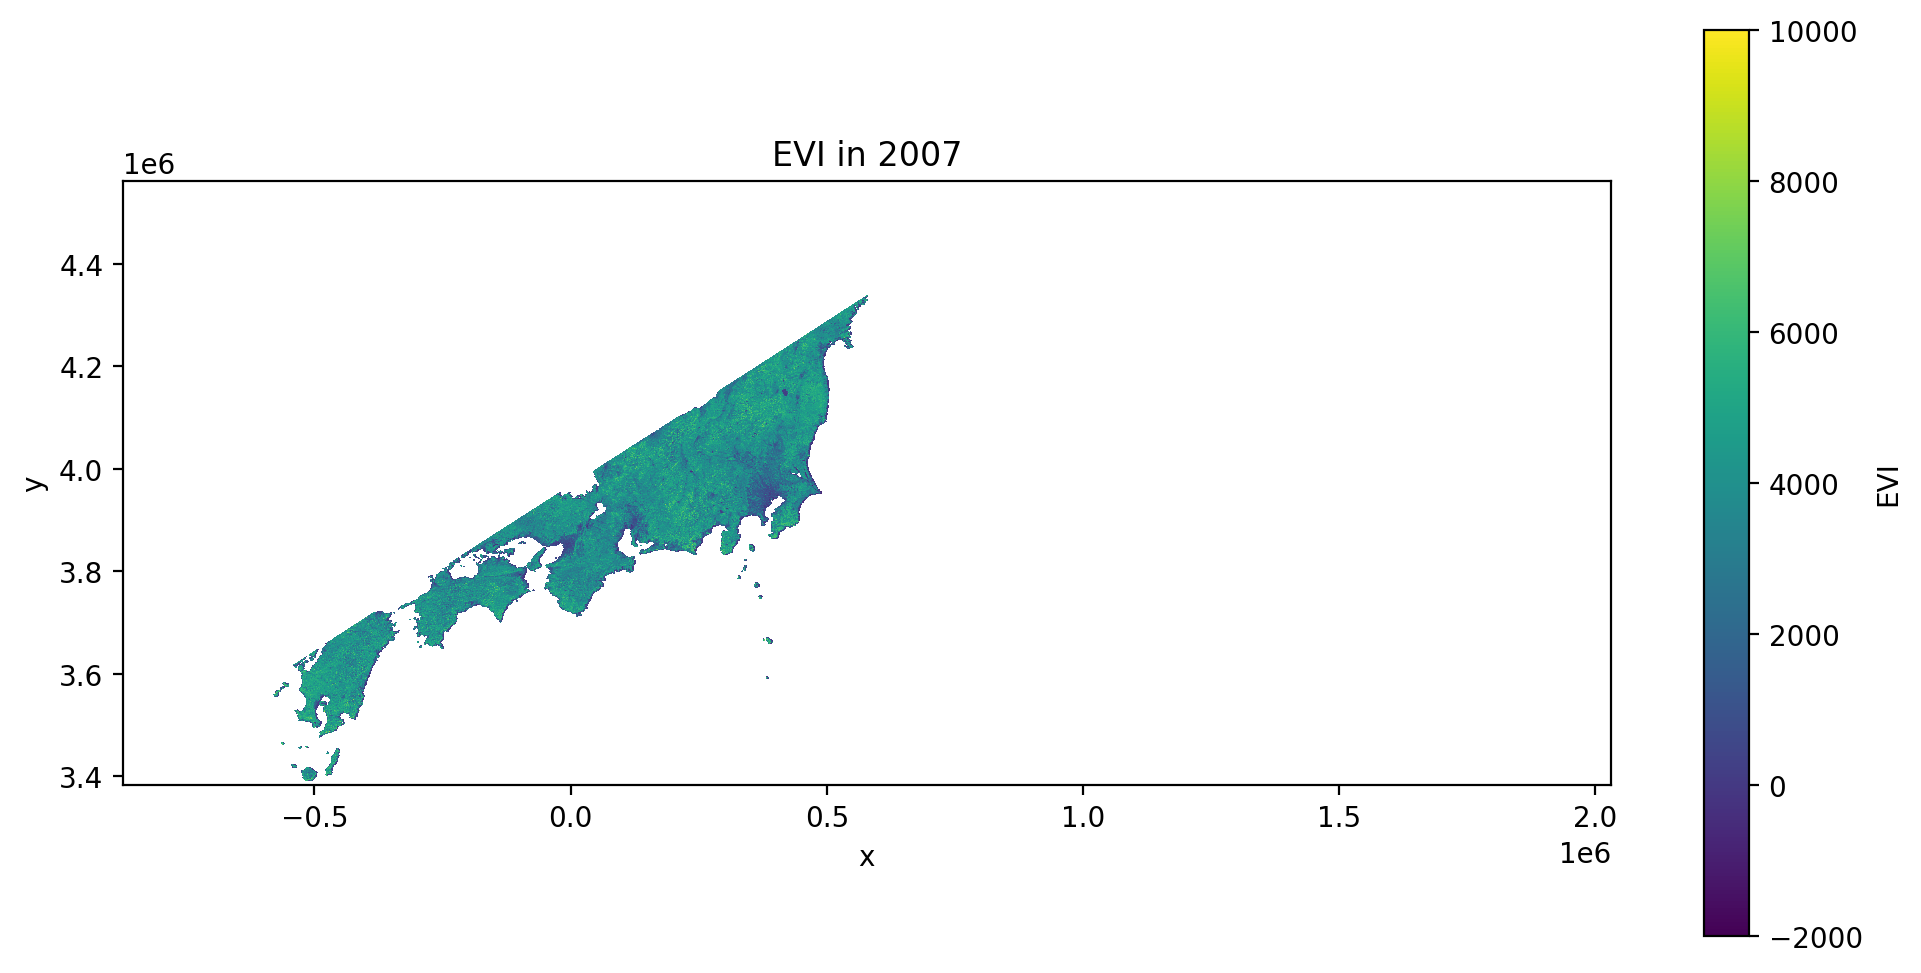

In [11]:
_fig, ax = plt.subplots(figsize=(12, 6))
evi_data.sel(time='2007').plot(ax=ax, vmin=-2000, vmax=10000)
ax.set_aspect('equal')
ax.set_title('EVI in 2007')

## 水田域における EVI の集計

茨城県の[「筆ポリゴンデータ」(農林水産省)](https://www.maff.go.jp/j/tokei/porigon/hudeporidl.html) をダウンロードし、GeoDataFrame として読み込む。

In [12]:
import requests
res = requests.get('http://www.machimura.maff.go.jp/polygon/08%E8%8C%A8%E5%9F%8E%E7%9C%8C%EF%BC%882021%E5%85%AC%E9%96%8B%EF%BC%89.zip')

In [13]:
from tempfile import TemporaryDirectory
from zipfile import ZipFile
from io import BytesIO
import glob

with TemporaryDirectory() as tmpdir:
  with ZipFile(BytesIO(res.content)) as fude_zip:
    fude_zip.extractall(tmpdir)
  
  shapefiles = glob.glob(tmpdir + '/**/*.shp', recursive=True)
  raw_agri_gdfs = [gpd.read_file(shapefile, encoding='Shift_JIS') for shapefile in shapefiles]

In [14]:
import pandas as pd
import rioxarray

# EPSG:30169 と EPSG:6677 が混ざっている（！）ため CRS を統一してから concat する
agri_gdf = pd.concat([gdf.to_crs(evi_data.rio.crs) for gdf in raw_agri_gdfs], ignore_index=True)
agri_gdf

,id,公開年度,調製年度,耕地の種類,geometry
0,080900336150060493,2021,2020,畑,"POLYGON ((455459.516 4017857.059, 455468.034 4..."
1,080900336330060432,2021,2020,畑,"POLYGON ((455368.877 4017856.616, 455398.573 4..."
2,080900336460060396,2021,2020,畑,"POLYGON ((455335.465 4017870.186, 455365.528 4..."
3,080900336490060483,2021,2020,田,"POLYGON ((455412.139 4017866.797, 455451.028 4..."
4,080900336660060342,2021,2020,田,"POLYGON ((455268.885 4017899.517, 455270.207 4..."
...,...,...,...,...,...
1117925,08090014640-010734,2021,2020,田,"POLYGON ((384299.932 3999362.570, 384307.778 3..."
1117926,08090014649-010850,2021,2020,田,"POLYGON ((384154.775 3999355.232, 384221.419 3..."
1117927,08090014655-010770,2021,2020,田,"POLYGON ((384267.870 3999371.493, 384268.036 3..."
1117928,08090014665-010841,2021,2020,田,"POLYGON ((384218.507 3999382.195, 384221.284 3..."


耕地の種類が「田」のものに絞り込み、これで `evi_data` をクリップする。

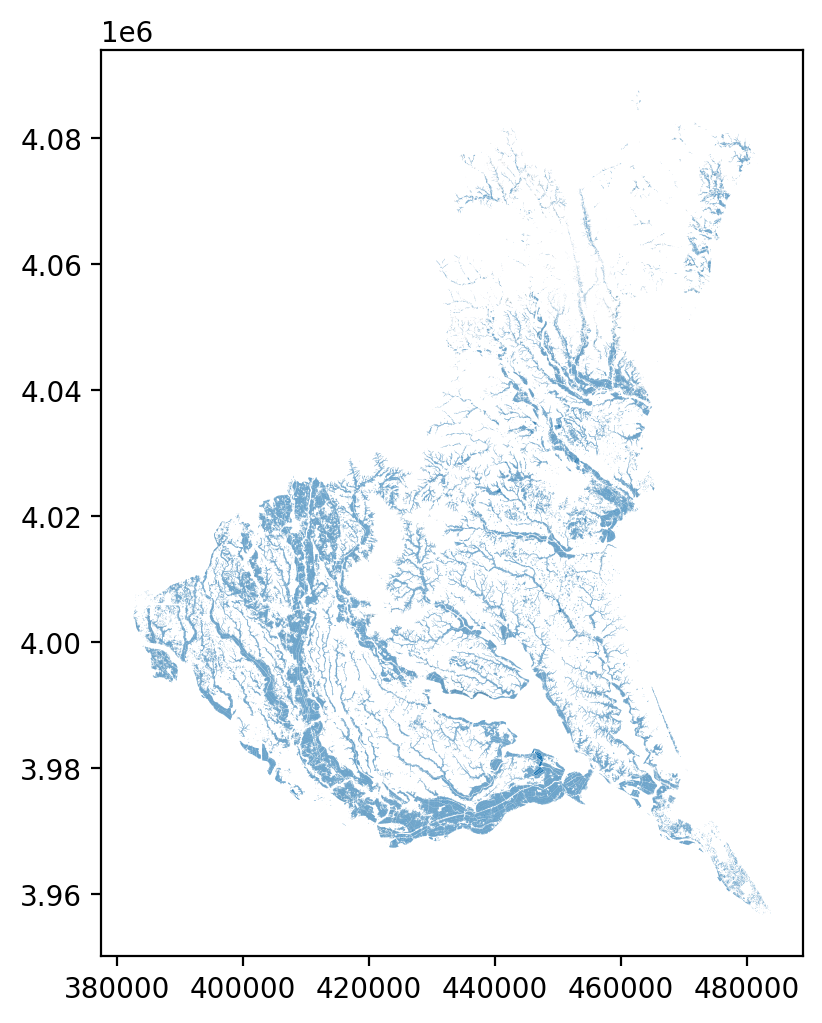

In [15]:
ta_gdf = agri_gdf[agri_gdf['耕地の種類'] == '田']
ta_gdf.plot()

In [16]:
clipped_evi = evi_data.rio.clip(ta_gdf.geometry.values)
clipped_evi

<xarray.DataArray 'EVI' (time: 15, band: 1, y: 503, x: 165)>
dask.array<getitem, shape=(15, 1, 503, 165), dtype=float64, chunksize=(1, 1, 410, 165), chunktype=numpy.ndarray>
Coordinates: (12/18)
  * band                   (band) <U16 '250m_16_days_EVI'
  * x                      (x) float64 3.828e+05 3.834e+05 ... 4.82e+05
  * y                      (y) float64 4.081e+06 4.081e+06 ... 3.958e+06
    modis:tile-id          <U8 '51029005'
    proj:geometry          object {'type': 'Polygon', 'coordinates': [[[13343...
    proj:transform         object {0.0, 231.65635826395825, -231.656358263958...
    ...                     ...
    modis:horizontal-tile  int64 29
    raster:bands           object {'unit': 'EVI', 'scale': 0.0001, 'data_type...
    title                  <U10 '16 day EVI'
    epsg                   int64 32654
  * time                   (time) datetime64[ns] 2007-01-01 ... 2021-01-01
    spatial_ref            int64 0
Attributes:
    spec:           RasterSpec(epsg=32654, bounds=(-873278.3776726952, 338359...
    resolution_xy:  (604.7634194409246, 245.117146422639)

Text(0.5, 1.0, 'EVI at Ibaraki Rice Paddies in 2007')

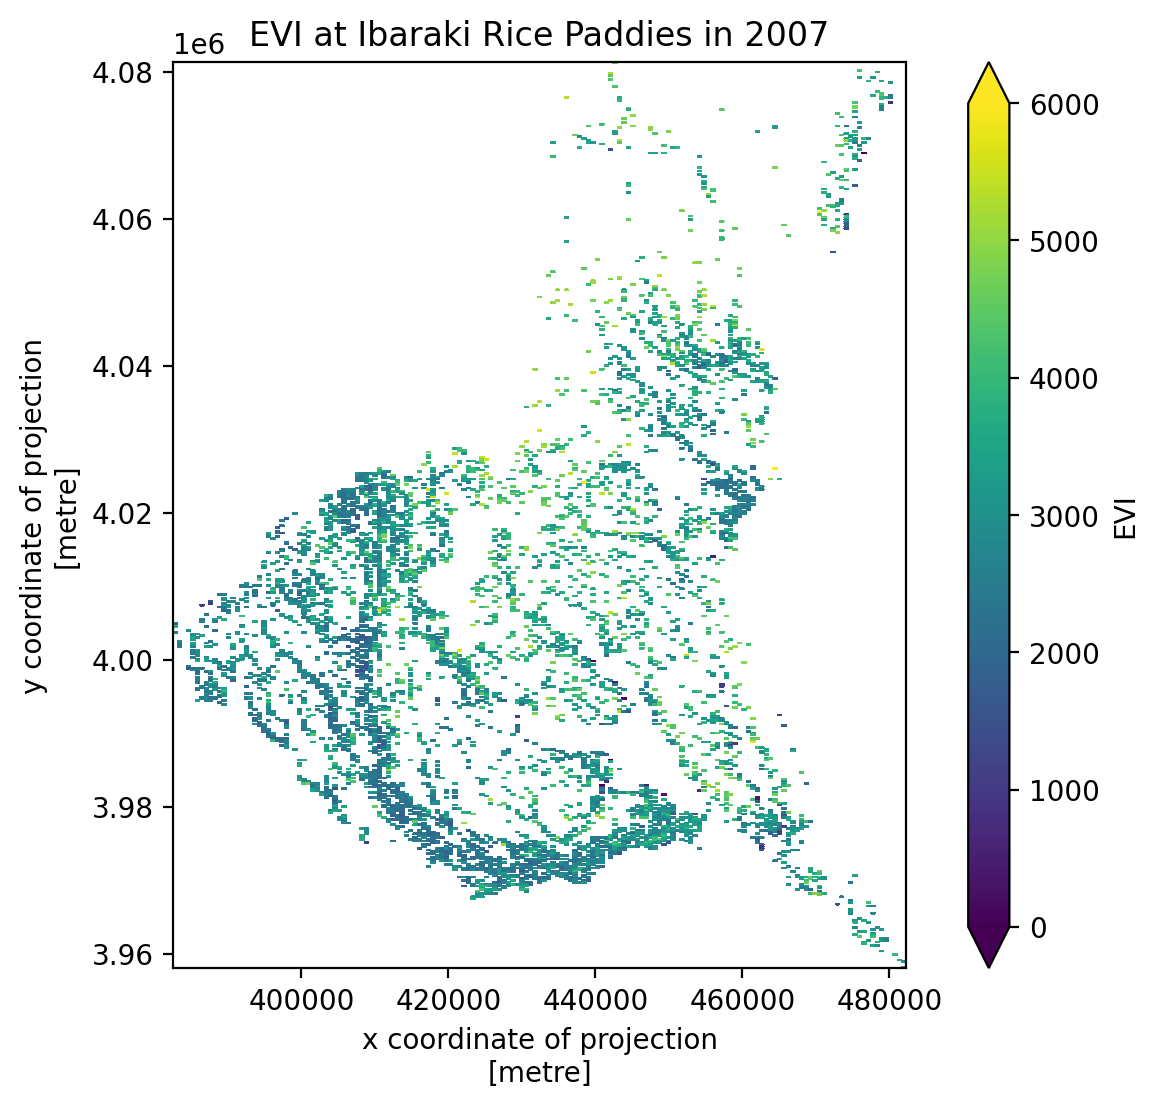

In [17]:
_fig, ax = plt.subplots()
clipped_evi.sel(time='2007').plot(ax=ax, vmin=0, vmax=6000)
ax.set_aspect('equal')
ax.set_title('EVI at Ibaraki Rice Paddies in 2007')

茨城県の水田における年ごとの EVI 平均値を求め、グラフ表示する。

In [18]:
mean_evi = clipped_evi.mean(dim=('x', 'y')).compute()
mean_evi

<xarray.DataArray 'EVI' (time: 15, band: 1)>
array([[3145.27257773],
       [3112.72783353],
       [2970.43865132],
       [2939.71960237],
       [3048.98612707],
       [3644.71526065],
       [3595.25440039],
       [3567.81935537],
       [3074.5608531 ],
       [3008.00082305],
       [3365.22263374],
       [3175.24038145],
       [3394.61085564],
       [3393.50057547],
       [3295.25942077]])
Coordinates: (12/16)
  * band                   (band) <U16 '250m_16_days_EVI'
    modis:tile-id          <U8 '51029005'
    proj:geometry          object {'type': 'Polygon', 'coordinates': [[[13343...
    proj:transform         object {0.0, 231.65635826395825, -231.656358263958...
    modis:vertical-tile    int64 5
    proj:wkt2              <U424 'PROJCS["unnamed",GEOGCS["Unknown datum base...
    ...                     ...
    modis:horizontal-tile  int64 29
    raster:bands           object {'unit': 'EVI', 'scale': 0.0001, 'data_type...
    title                  <U10 '16 day EVI'
    epsg                   int64 32654
  * time                   (time) datetime64[ns] 2007-01-01 ... 2021-01-01
    spatial_ref            int64 0

Text(0.5, 1.0, 'Time-series of EVI at Ibaraki Rice Paddies')

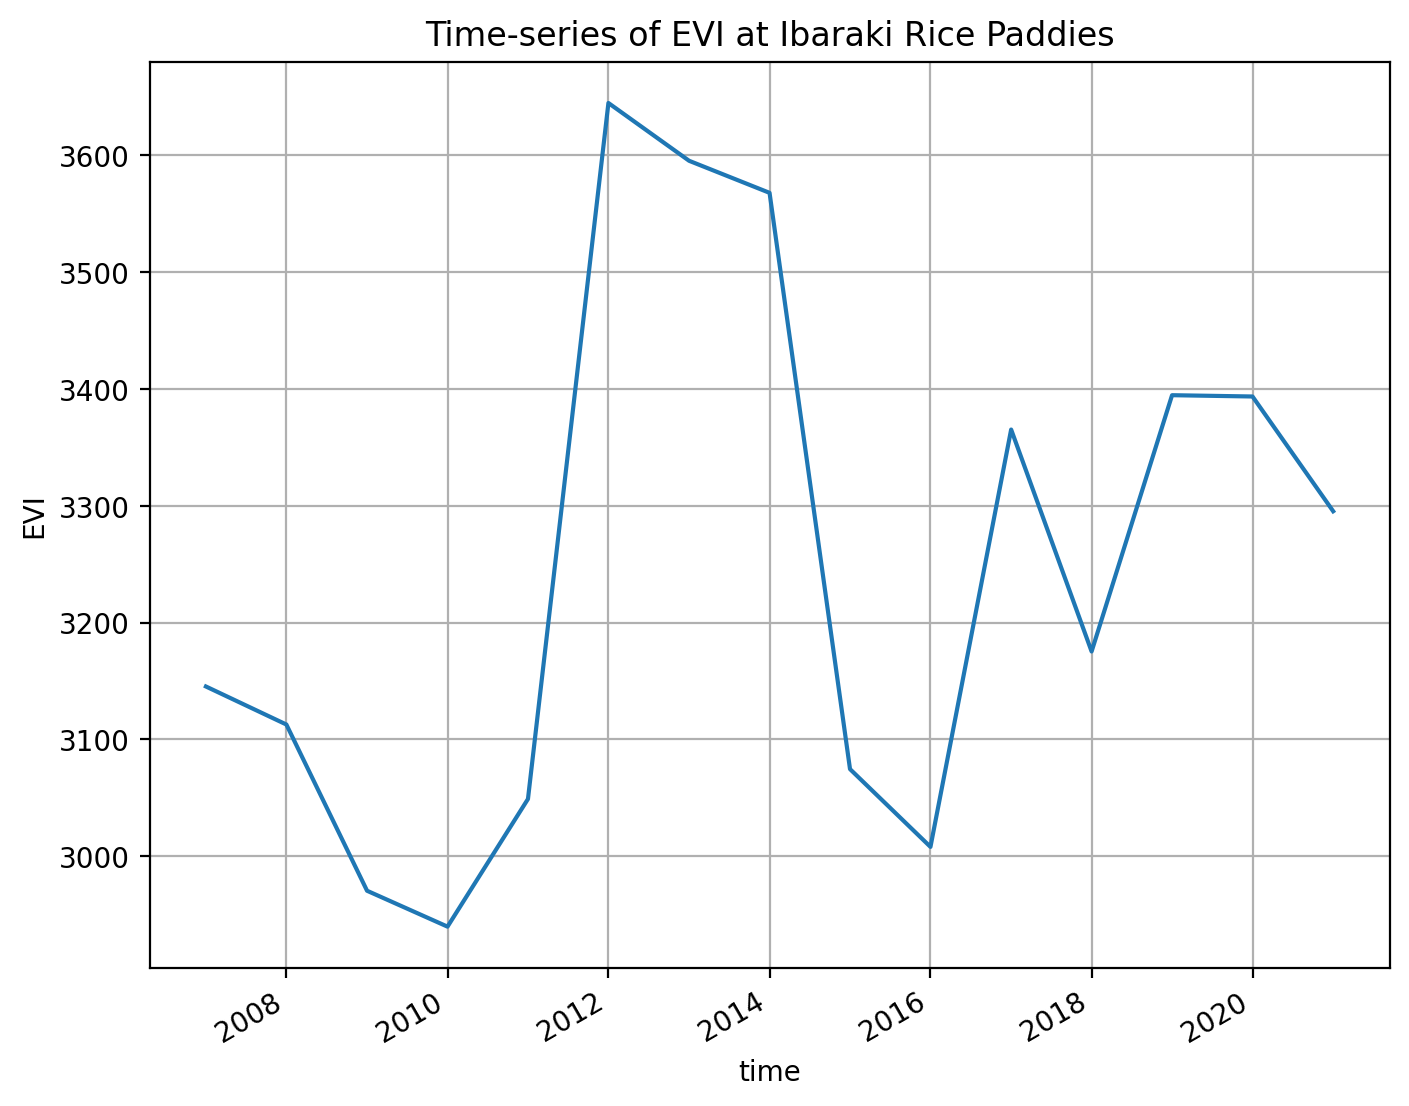

In [19]:
mean_evi.plot()
plt.grid(True)
plt.title('Time-series of EVI at Ibaraki Rice Paddies')

## 日射量と EVI の比較

AMeDAS データを GUI を使わずに取得する方法が公式にないためスキップ。

## 水稲収量の予測

政府統計総合窓口（e-Stat）より、[作物統計調査 / 市町村別データ](https://www.e-stat.go.jp/stat-search/database?page=1&layout=dataset&toukei=00500215&statdisp_id=0003293480) を取得する。

In [20]:
import getpass
app_id = getpass.getpass('e-Stat の appId: ')

e-Stat の appId: ··········


In [21]:
rice_df = pd.read_csv(
    f'http://api.e-stat.go.jp/rest/3.0/app/getSimpleStatsData?appId={app_id}&statsDataId=0003293480&sectionHeaderFlg=2',
    dtype={'value': float},
    na_values=['－', 'X', '…']
)
rice_df['time'] = pd.to_datetime(rice_df['時間軸（年次）'], format='%Y年')
rice_df

,cat01_code,面積収量収穫量,area_code,市町村,time_code,時間軸（年次）,unit,value,annotation,time
0,100,作付面積,1000,北海道,2020000000,2020年,ha,102300.0,NaN,2020-01-01
1,100,作付面積,1000,北海道,2019000000,2019年,ha,103000.0,NaN,2019-01-01
2,100,作付面積,1000,北海道,2018000000,2018年,ha,104000.0,NaN,2018-01-01
3,100,作付面積,1000,北海道,2017000000,2017年,ha,103900.0,NaN,2017-01-01
4,100,作付面積,1000,北海道,2016000000,2016年,ha,105000.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...
74269,120,収穫量,47382,沖縄県与那国町,2011000000,2011年,t,106.0,NaN,2011-01-01
74270,120,収穫量,47382,沖縄県与那国町,2010000000,2010年,t,67.0,NaN,2010-01-01
74271,120,収穫量,47382,沖縄県与那国町,2009000000,2009年,t,198.0,NaN,2009-01-01
74272,120,収穫量,47382,沖縄県与那国町,2008000000,2008年,t,225.0,NaN,2008-01-01


茨城県の10a当たり収量に絞り込む。

In [22]:
rice_df[(rice_df['市町村'] == '茨城県') & (rice_df['面積収量収穫量'] == '10a当たり収量')]

,cat01_code,面積収量収穫量,area_code,市町村,time_code,時間軸（年次）,unit,value,annotation,time
30528,110,10a当たり収量,8000,茨城県,2020000000,2020年,kg,531.0,NaN,2020-01-01
30529,110,10a当たり収量,8000,茨城県,2019000000,2019年,kg,504.0,NaN,2019-01-01
30530,110,10a当たり収量,8000,茨城県,2018000000,2018年,kg,524.0,NaN,2018-01-01
30531,110,10a当たり収量,8000,茨城県,2017000000,2017年,kg,525.0,NaN,2017-01-01
30532,110,10a当たり収量,8000,茨城県,2016000000,2016年,kg,521.0,NaN,2016-01-01
30533,110,10a当たり収量,8000,茨城県,2015000000,2015年,kg,505.0,NaN,2015-01-01
30534,110,10a当たり収量,8000,茨城県,2014000000,2014年,kg,548.0,NaN,2014-01-01
30535,110,10a当たり収量,8000,茨城県,2013000000,2013年,kg,542.0,NaN,2013-01-01
30536,110,10a当たり収量,8000,茨城県,2012000000,2012年,kg,540.0,NaN,2012-01-01
30537,110,10a当たり収量,8000,茨城県,2011000000,2011年,kg,521.0,NaN,2011-01-01


2011年よりも前の県単位のデータがないため、市町村単位のデータの平均値で簡易的に代替する。

In [23]:
ibaraki_rice_series = pd.concat([
    rice_df[
        (rice_df['面積収量収穫量'] == '10a当たり収量') & \
        (rice_df['市町村'] == '茨城県')
    ].set_index('time')['value'],
    rice_df[
        (rice_df['面積収量収穫量'] == '10a当たり収量') & \
        rice_df['市町村'].str.startswith('茨城県') & \
        (rice_df['time'] < '2011-01-01')
    ].groupby('time')['value'].mean()
]).sort_index()
ibaraki_rice_series

time
2007-01-01    501.659091
2008-01-01    529.386364
2009-01-01    517.500000
2010-01-01    517.318182
2011-01-01    521.000000
2012-01-01    540.000000
2013-01-01    542.000000
2014-01-01    548.000000
2015-01-01    505.000000
2016-01-01    521.000000
2017-01-01    525.000000
2018-01-01    524.000000
2019-01-01    504.000000
2020-01-01    531.000000
Name: value, dtype: float64

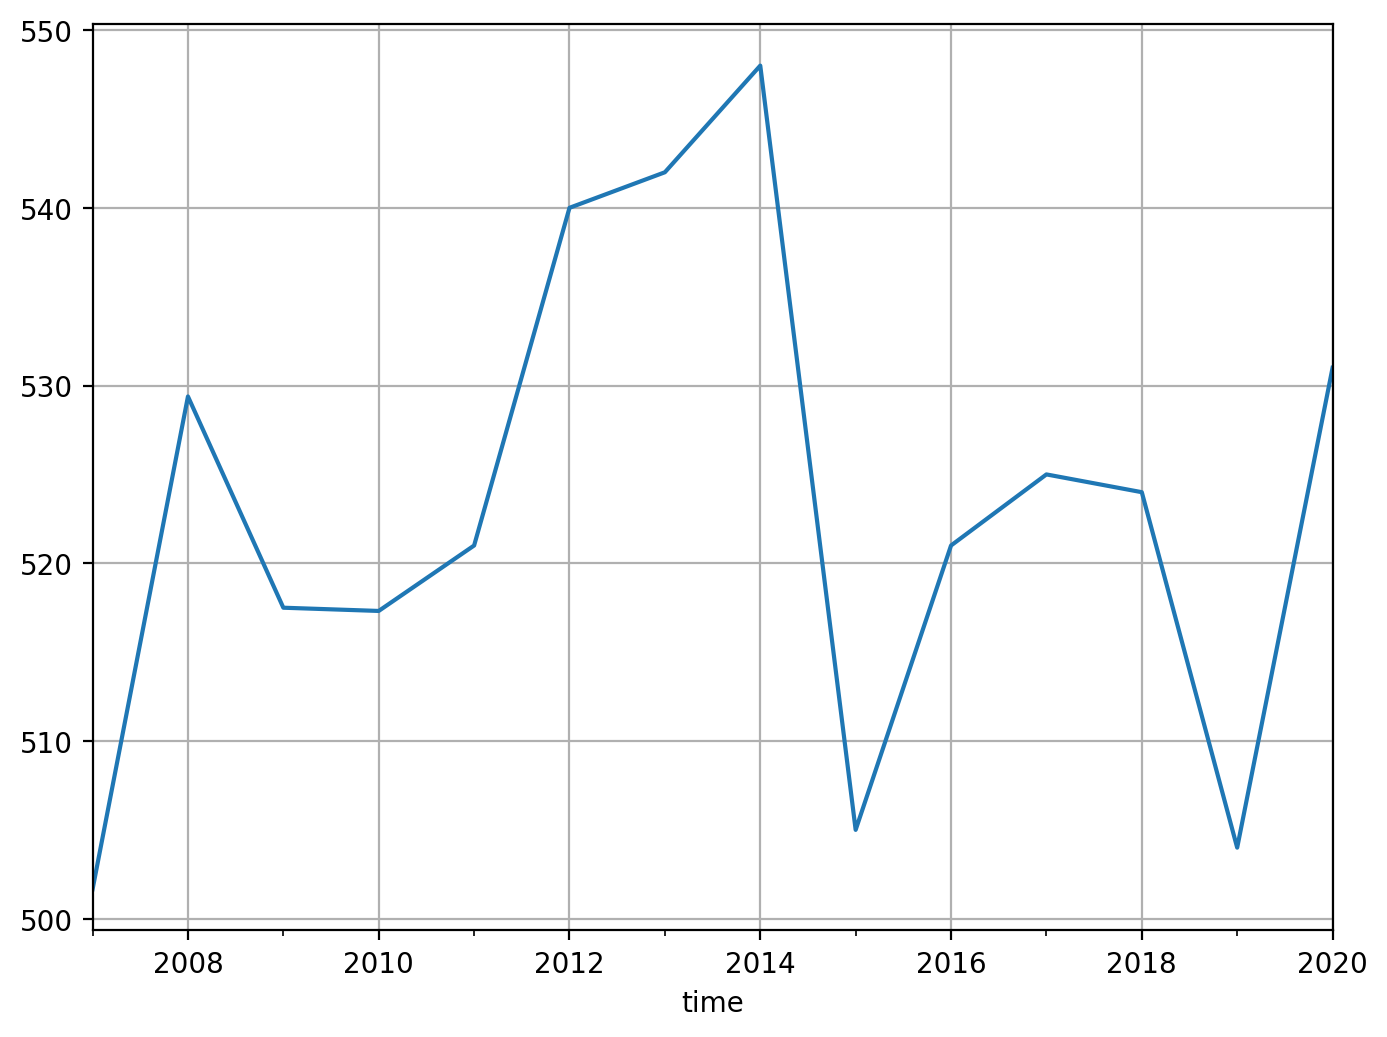

In [24]:
ibaraki_rice_series.plot(grid=True)

`mean_evi` と `ibaraki_rice_series` を1つの DataFrame にし、グラフ表示する。

In [25]:
evi_rice_df = pd.DataFrame({
    'EVI': mean_evi.squeeze('band').to_series(),
    'Rice yields': ibaraki_rice_series
})
evi_rice_df

,EVI,Rice yields
time,,
2007-01-01,3145.272578,501.659091
2008-01-01,3112.727834,529.386364
2009-01-01,2970.438651,517.500000
2010-01-01,2939.719602,517.318182
2011-01-01,3048.986127,521.000000
2012-01-01,3644.715261,540.000000
2013-01-01,3595.254400,542.000000
2014-01-01,3567.819355,548.000000
2015-01-01,3074.560853,505.000000


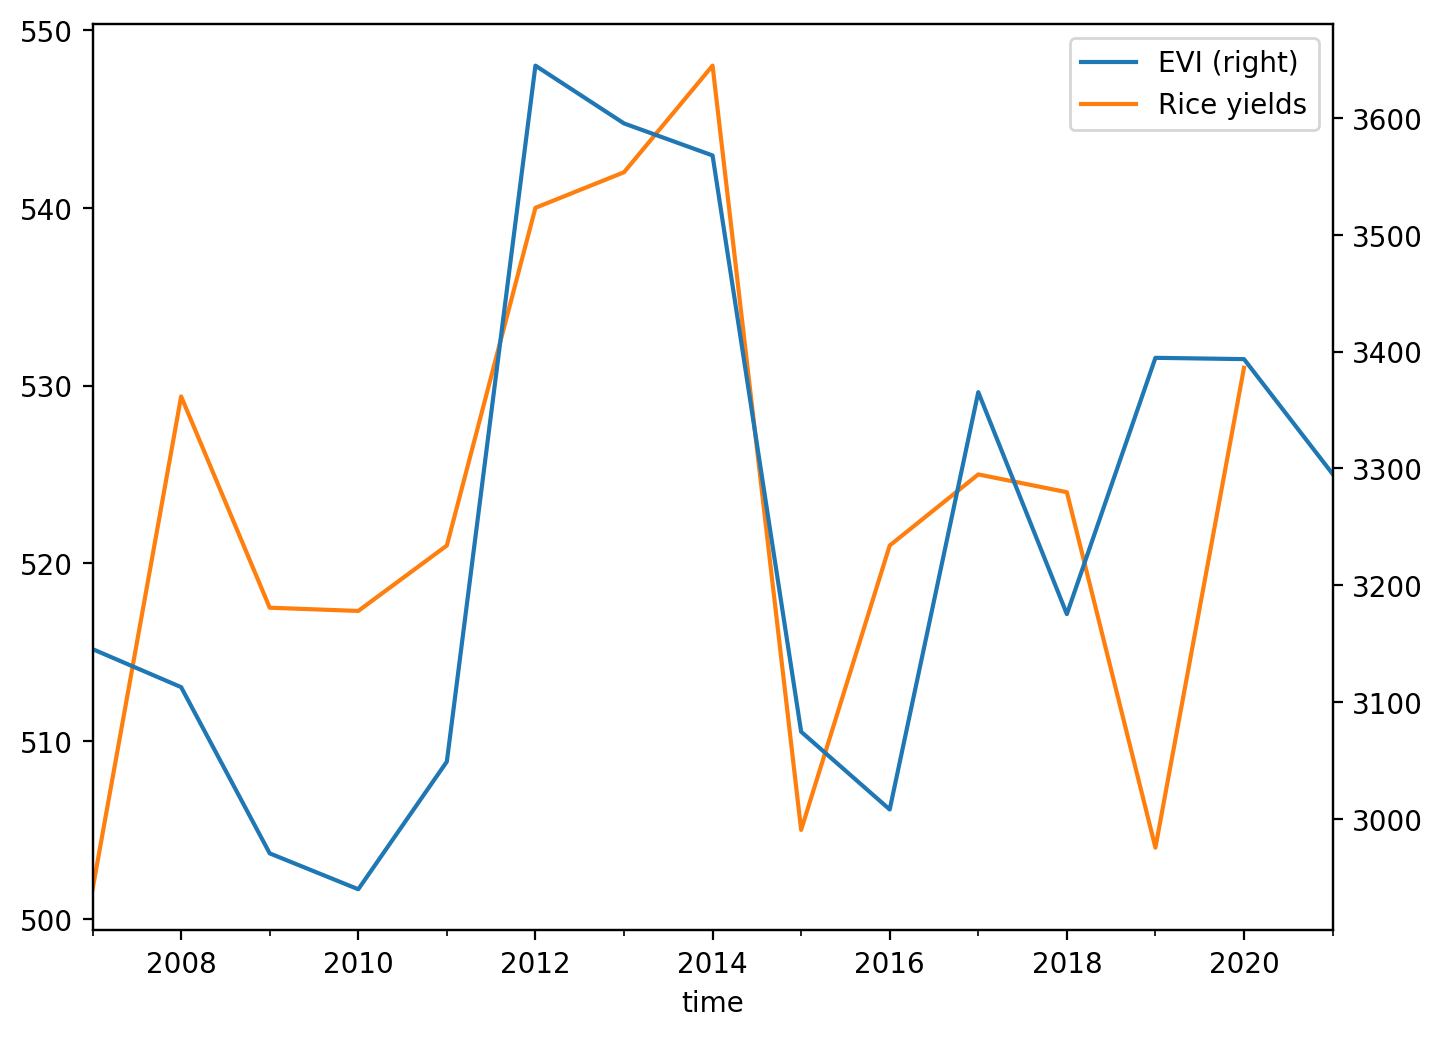

In [26]:
evi_rice_df.plot(secondary_y='EVI')

EVI と米の収量の相関係数を計算する。

In [27]:
evi_rice_df.corr()

,EVI,Rice yields
EVI,1.00000,0.63758
Rice yields,0.63758,1.00000


2020年までのデータで EVI から米の収量を予測する線形回帰モデルを作成し、散布図上にプロットする。

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = evi_rice_df[:'2020']['EVI'].values.reshape(-1, 1)
y = evi_rice_df[:'2020']['Rice yields'].values.reshape(-1, 1)
reg.fit(X, y)
reg.score(X, y)

0.40650881372773673

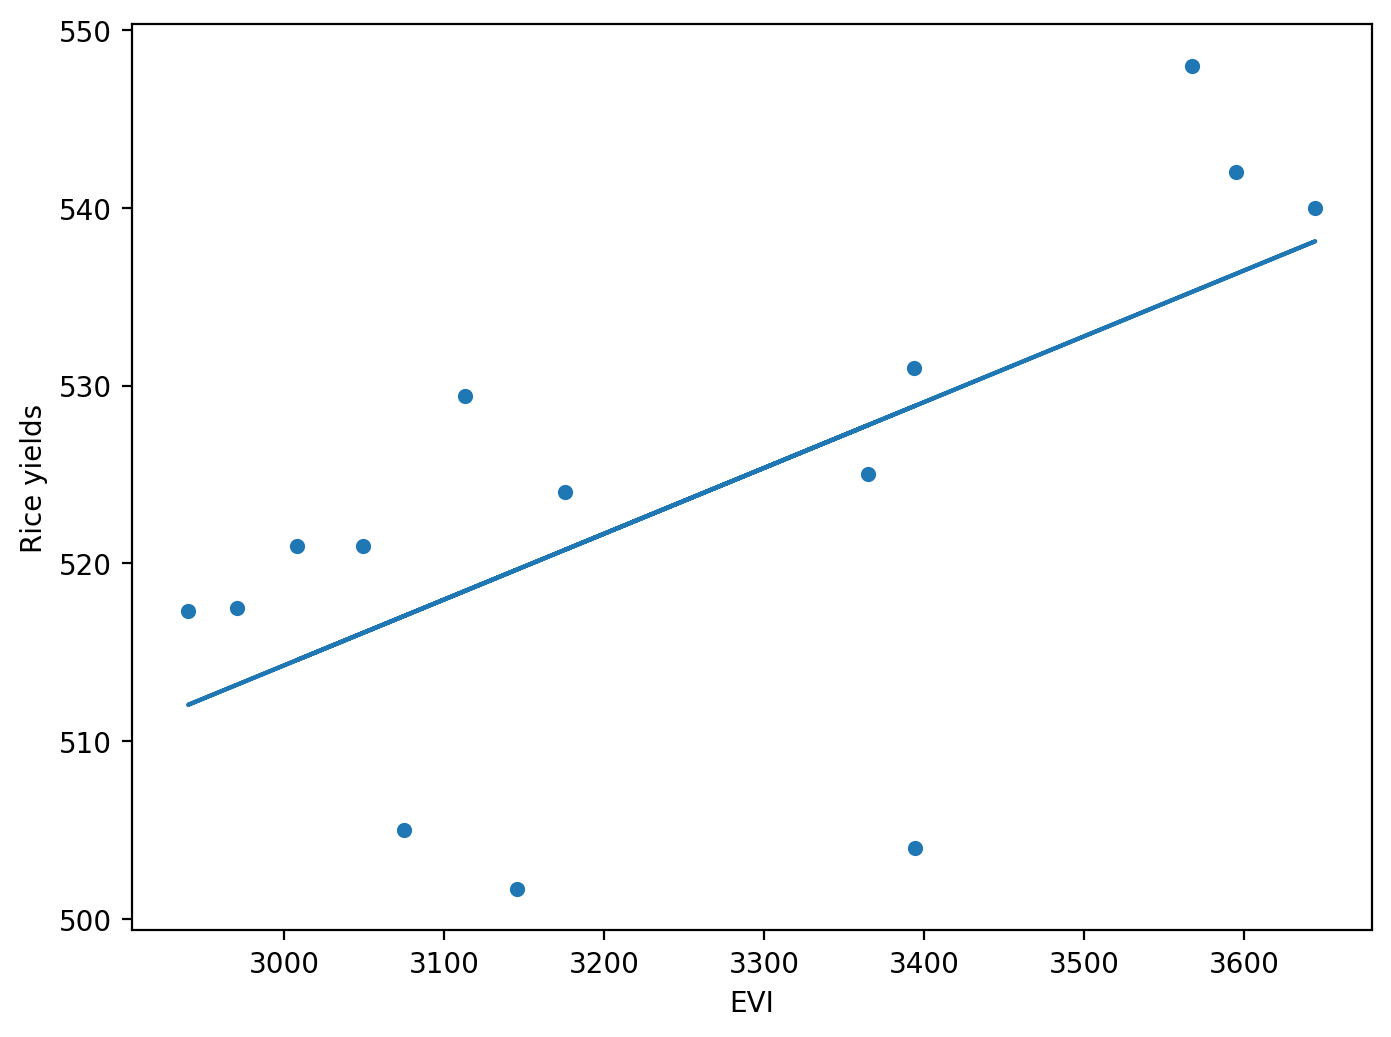

In [29]:
ax = evi_rice_df.plot.scatter(x='EVI', y='Rice yields')
ax.plot(X, reg.predict(X))

作成したモデルで2021年の年の米の収量を予測する。

In [30]:
evi_2021 = evi_rice_df['EVI'].loc['2021'].values.reshape(-1, 1)
reg.predict(evi_2021)

array([[525.19119904]])